**MULTIPLE LINEAR REGRESSION**
---

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv("/content/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21613, 21)

In [4]:
df = df.drop(['id', 'date',], axis=1)

In [5]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
reg = LinearRegression()

In [11]:
reg.fit(X_train,Y_train)

LinearRegression()

In [12]:
reg.coef_

array([-3.56539120e+04,  3.80042095e+04,  1.10999465e+02,  1.74111839e-01,
        4.96608197e+03,  5.72267970e+05,  5.24571587e+04,  2.61523883e+04,
        9.70685180e+04,  7.15655850e+01,  3.94338804e+01, -2.56453259e+03,
        1.83819330e+01, -5.79384758e+02,  6.04638286e+05, -2.24322055e+05,
        2.23937299e+01, -4.15388588e-01])

In [13]:
reg.intercept_

np.float64(5016838.646691169)

In [14]:
Y_train_Prediction = reg.predict(X_train)

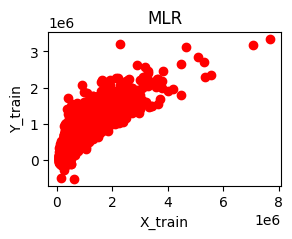

In [15]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted
plt.figure(figsize=(3,2))
plt.scatter(Y_train, Y_train_Prediction, color='red')  # Red Dots for Actual vs Predicted

plt.title('MLR')
plt.xlabel('X_train')
plt.ylabel('Y_train')
plt.show()

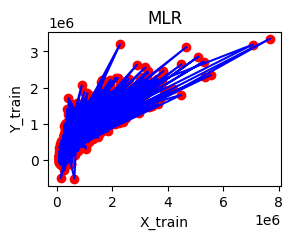

In [16]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted
plt.figure(figsize=(3,2))
plt.scatter(Y_train, Y_train_Prediction, color='red')  # Red Dots for Actual vs Predicted
plt.plot(Y_train, Y_train_Prediction, color='blue')    # Blue Line for Perfect Prediction Line

plt.title('MLR')
plt.xlabel('X_train')
plt.ylabel('Y_train')
plt.show()

In [17]:
Y_train.shape

(17290,)

In [18]:
X_train.shape

(17290, 18)

In [19]:
from sklearn.metrics import r2_score

In [20]:
print(f"Accuracy for training data : {r2_score(Y_train,Y_train_Prediction)}")

Accuracy for training data : 0.6992210517480398


In [21]:
Y_test_Prediction = reg.predict(X_test)

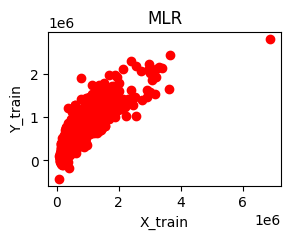

In [22]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted
plt.figure(figsize=(3,2))
plt.scatter(Y_test, Y_test_Prediction, color='red')

plt.title('MLR')
plt.xlabel('X_train')
plt.ylabel('Y_train')
plt.show()

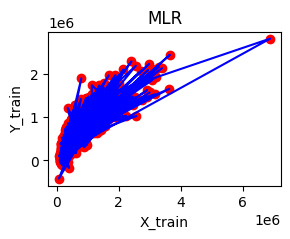

In [23]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted
plt.figure(figsize=(3,2))
plt.scatter(Y_test, Y_test_Prediction, color='red')
plt.plot(Y_test, Y_test_Prediction, color='blue')

plt.title('MLR')
plt.xlabel('X_train')
plt.ylabel('Y_train')
plt.show()

In [24]:
from sklearn.metrics import r2_score

In [25]:
print(f"Accuracy for testing data : {r2_score(Y_test,Y_test_Prediction)}")

Accuracy for testing data : 0.7015514024426337


In [31]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [32]:
new_data = pd.DataFrame([[3, 2.5, 1800, 5000, 2, 0, 1, 3, 7, 1200, 600, 1995, 0, 98178, 47.5112, -122.257, 1600, 4000]],
                        columns=X_train.columns)

predicted_price = reg.predict(new_data)
print("Predicted Price: $", round(predicted_price[0], 2))

Predicted Price: $ 322543.29


In [33]:
# saving the Model:
import pickle

In [34]:
with open('Linear_Regression_Model.pkl','wb') as f:
  pickle.dump(reg,f)

In [35]:
with open("/content/Linear_Regression_Model.pkl","rb") as f:
  model_from_file = pickle.load(f)